## Data generation and visualization for regression and classification

**Goal**: generate synthetic data for both regression and classification tasks

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation: regression, linear

Vogliamo generare dei dati che abbiano una relazione lineare tra x e y e ci aggiungiamo un po di rumore.

Model is $y=wx + ɛ$ with $\varepsilon \sim \mathcal{N}(0, \sigma)$

Il rumore, come viene spesso fatto nei problemi di ML, viene supposto gaussiano con media zero

In [1]:
def datagen(d, points, m, M, w, sigma):
    """
    Parameters
    ----------
    d : int
        Dimension of each data sample   , la dimensione in cui vivono i miei dati, colonne della matrice X
    points : int
        Number of points to be generated  numero di righe della matrice
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    w : float array of dim d 
        Vector of weights of the linear model - coefficienti della combinazione lineare
    sigma : float
        Standard deviation of the noise eps
    """
    # creo la matrice
    X = np.zeros((points, d))   # inizializzo una matrice che contiene "points" righe e "d" colonne
    # riempio riga a riga la mia matrice prendendo i dati da una Uniforme(m,M)
    for i in range(points):  
        X[i,:] = np.random.uniform(m, M, d) 
    # aggiungo rumore ai dati  
    eps = np.random.normal(0, sigma, points)  
    # genero il vettore della variabile risposta y
    y = np.dot(X, w) + eps 
    return X, y

In [3]:
# ESEMPIO RETTA
d = 1 
w = np.random.normal(0, 1, d) # genero vettore dei pesi (in questo caso è un singolo valore)
sigma = 1  # Standard deviation
points = 100 # 100 righe cioè 100 punti
m = -10
M = 10

X, y = datagen(d, points, m, M, w, sigma)

(-10.0, 10.0)

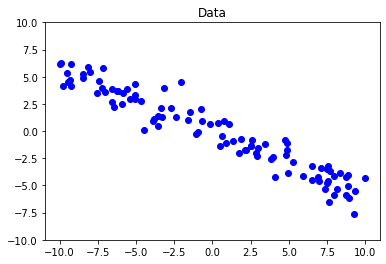

In [4]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data')
plt.ylim([m, M])

#fig.show()

Otteniamo quindi dei punti che ocillano attorno ad una retta.

Piccolo test:

1. Add different level of noise (how do you get noiseless data?) and interpolating line to the plot

(-10.0, 10.0)

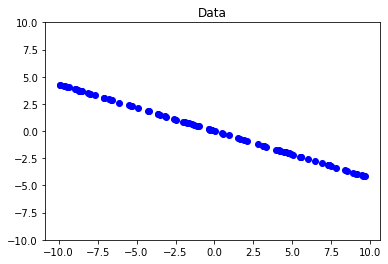

In [5]:
# usage example 
d = 1 
w = np.random.normal(0, 1, d) 
sigma = 0  # se metto SDV a zero annullo il rumore e i punti si distribuiscono sulla retta
points = 100 
m = -10
M = 10

X, y = datagen(d, points, m, M, w, sigma)

# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X, y, c='b')
ax.set_title('Data')
plt.ylim([m, M])

## Data generation: classification

We want to generate  2D data for classification  in the form of 2 (or more) gaussian clouds with specific means and variances.

In [6]:
def mixGauss(means, sigmas, n):
    """
    Parameters
    ----------
    means : matrix/list of float of dim n_classes x dim_data (d)
        Means of the Gaussian functions -  media della gausiana
    sigmas : array/list of float of dim n_classes
        Standard deviation of the Gaussian functions  - devstd della gaussiana
    n : int
        Number of points for each class  - numero di punti
    """
    means = np.array(means)    
    sigmas = np.array(sigmas)

    d = np.shape(means)[1] # ottengo numero di colonne
    num_classes = sigmas.size # the number of variances is the number of classes
    

    data = np.full((n * num_classes, d), np.inf) # creo la matrice dei dati inizializzata ad inf
    labels = np.zeros(n * num_classes)  # creo il vettore dei labels

    # popoliamo la matrice dei dati: metto prima tutti i punti della prima gaussiana, poi quelli della seconda e cosi via
    for idx, sigma in enumerate(sigmas): # due variabili di iterazione
        
        # generates n points around means[idx] with cov sigma[idx] 
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(
            mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)   
        labels[idx * n:(idx + 1) * n] = idx 
    
    # meglio non mettere 0 e 1 come labels perchè 0 è un num problematico. meglio -1
    if(num_classes == 2): # se ho un problema di classificazione binaria
        labels[labels == 0] = -1  # li dove c'è 0 sostituisci con 1

    return data, labels

In [9]:
# usage example 
means = [[3,0],[0,6]] # lista di medie, quindi calssificazione binaria!
sigmas = [0.9,0.9] # array delle devstd
n = 100

X, labels = mixGauss(means, sigmas, n)

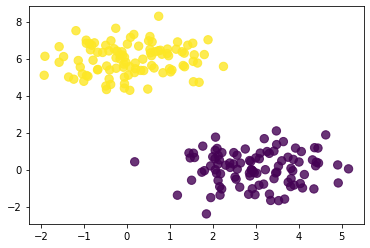

In [10]:
# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=labels, alpha=0.8) # metto come discriminante dei colori i labels
#fig.show()

#### Label Noise

Add some noise to the dataset for binary classification by randomly flipping some labels

In [11]:
# prendo alcuni punti e scambio l'etichetta, perchè nel mondo reale i dati sono sporchi

def labelsnoise(perc, labels):
    """
    Parameters
    ----------
    perc : float 
        Percentage of labels to be flipped  - % dei dati in cui flippare i labels
    labels: array of int of dim n_classes
        Array containing labels idxs  -  vettore con i indici dei label
    """
    points = np.shape(labels)[0] # prendiamo il numero dei punti
    noisylabels = np.copy(np.squeeze(labels))  # lo copio, e uso squeeze togliendo le dimensioni fittizie
    n_flips = int(np.floor(points * perc / 100)) # floor: nearest integer by defect  ottengo il numero di flips da fare
    # np.random.choice mi estrae a caso
    idx_to_flip = np.random.choice(points, size=n_flips, replace=False) # replace is false since the same index cannot be chosen twice
    # visto che siamo in classificazione binaria:
    noisylabels[idx_to_flip] = -noisylabels[idx_to_flip] # for binary this turns -1 into 1 and viceversa
    return noisylabels


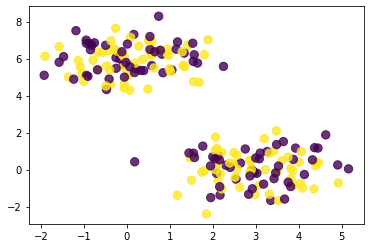

In [12]:
# usage example 
noisylabels = labelsnoise(50, labels)

# plotting the generated dataset
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=70, c=noisylabels, alpha=0.8) # metto come discriminante dei colori i labels
#fig.show()

### Alternative for binary classification: linear
==================================

Adesso anziche dividerli in due nuvole, vogliamo che i dati siano distribuiti come vogliono nello spazzio (non per forza gaussiani) ma vogliamo che tra una classe e l'altra ci sia una linea retta che li divide

Generate a dataset for classification in which points are linearly separated, i.e. there exists a line $y = ax + b$ that separes the classes

In [13]:
def binary(a, b, points, m, M, d):
    """
    Parameters
    ----------
    a : float
        Angular coefficient of the separating line - coeff ang della retta
    b : float
        Intercept of the separating line - intercetta
    points : int
        Number of points to be generated 
    m : float
        Lower bound for the domain of the data points
    M : float
        Upper bound for the domain of the data points
    d : int
        Dimension of each data sample
    """
    # creo dataset random
    
    X = np.zeros((points,d))
    labels = np.zeros(points)
    # genero i dati
    for i in range(points):
        X[i,:] = np.random.uniform(m, M, d)
    
    # vogliamo che i punti che stanno sopra alla retta abbiano label 1, e queli sotto -1
    labels[X[:,1]-a*X[:,0]-b>=0] = 1 # cerco nella tabella quelli che stanno sopra
    labels[X[:,1]-a*X[:,0]-b<0] = -1
    return X, labels    

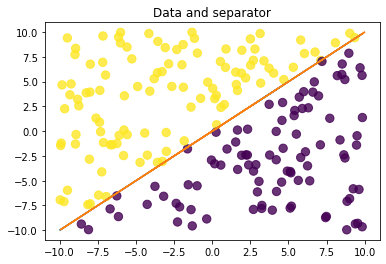

In [14]:
# usage example
a=1
b=0
d=2
points=200
m=-10
M=10

X,labels=binary(a,b,points,m,M,d)

# plotting the generated dataset
fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],s=70, c=labels, alpha=0.8)
ax.plot(X,a*X+b)
ax.set_title('Data and separator')
plt.show()

### Alternative for binary classification: non-linear
==============================================

Adesso vediamo un tipo di separatore che non sia lineare.

Add some noise to the binary classification dataset by randomly flipping some labels;

Generate Binary classification datasets which are separated by non-linear functions.

In [15]:
# anche qui sporco un pochino i dati

def flipLabels(perc, Y):
    """
    Parameters
    ----------
    perc : float 
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")  # controlli
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")  # controlli
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

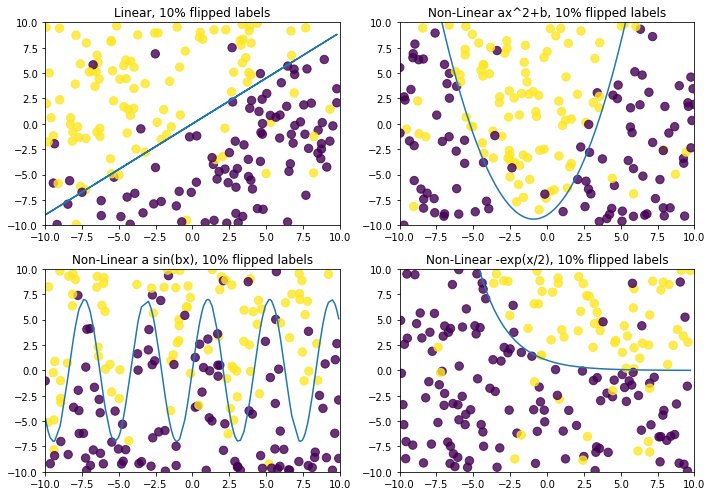

In [16]:
n = 200 # number of points per class
D = 2 # dimension of the points

# diciamo a matplotlib di dividere in 4 parti l'immagine

fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)


################################################## linear case
m = 0.9
q = 0

# bounds (assume they are the same for all dimensions)
low_D = -10
high_D = 10

X = np.zeros((n, D))
Y = np.zeros(n)

# sampling of the X
for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
# assigning the labels depending on the position of the sample with respect to the linear separator
Y[X[:,1] - (X[:,0] * m + q) > 0] = 1 
Y[Y==0] = -1

# add some noise
Yn = flipLabels(10, Y)

# plot the samples and the separator
ax0.set_title("Linear, 10% flipped labels")
ax0.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax0.plot(X[:,0], X[:,0] * m + q)
ax0.set_xlim((low_D, high_D))
ax0.set_ylim((low_D, high_D))


##################################################### non-linear separators case 1

a = 0.5
b = 0.9
c = -9

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - (X[:,0]**2 * a + X[:,0]*b + c) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax1.set_title("Non-Linear ax^2+b, 10% flipped labels")
ax1.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax1.plot(np.sort(X[:,0]), np.sort(X[:,0])**2 * a + np.sort(X[:,0])*b + c)
ax1.set_xlim((low_D, high_D))
ax1.set_ylim((low_D, high_D))

############################################################### non-linear case 2

alpha = 7
beta = 1.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - alpha*np.sin(beta*X[:,0]) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax2.set_title("Non-Linear a sin(bx), 10% flipped labels")
ax2.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax2.plot(np.sort(X[:,0]), alpha*np.sin(beta*np.sort(X[:,0])))
ax2.set_xlim((low_D, high_D))
ax2.set_ylim((low_D, high_D))

################################################################# non-linear case 3

alpha = 7
beta = 0.5

X = np.zeros((n, D))
Y = np.zeros(n)

for i in range(D):
    X[:,i] = np.random.uniform(low_D, high_D, size=n)
    
Y[X[:,1] - np.exp(-X[:,0]/2) > 0] = 1 
Y[Y==0] = -1

Yn = flipLabels(10, Y)

ax3.set_title("Non-Linear -exp(x/2), 10% flipped labels")
ax3.scatter(X[:,0], X[:,1], s=70, c=Yn, alpha=0.8)
ax3.plot(np.sort(X[:,0]), np.exp(-np.sort(X[:,0]/2)))
ax3.set_xlim((low_D, high_D))
ax3.set_ylim((low_D, high_D))
             
plt.tight_layout()

## More than 2 Gaussians
===================

Generate  2D data for (binary) classification  in the form of more than $2$ gaussian clouds with specific means and variances.

**Hint**: first generate the dataset with 4 classes, then transform the labels to get the binary labels... function `np.mod()` might be useful! 

In [18]:
# generate two datasets: binary (2 classes) and non binary (4 classes) 
# usage of the np.mod() function
x = np.array([0, 2, 2, 1, 0, 3]) # array of 4 labels 
y = np.mod(x, 2) # transform the labels so that they are now binary
print(y)

[0 0 0 1 0 1]


In [19]:
# from {0, 1} labels to {-1, 1} labels
z = 2 * y - 1
print(z) 

[-1 -1 -1  1 -1  1]


In [20]:
# generate two datasets: binary (2 classes) and non binary (4 classes) 
# classification with more than two gaussians
mu = [[0,0], [0,1], [1,1], [1,0]] # 4 classes, 2-dim points
sigma = [0.2, 0.2, 0.2, 0.2] # 4 classes
X, y = mixGauss(mu, sigma, 200) 

# transform y so that it represents a binary classification problem for the same dataset
y_bin = 2 * np.mod(y, 2) - 1

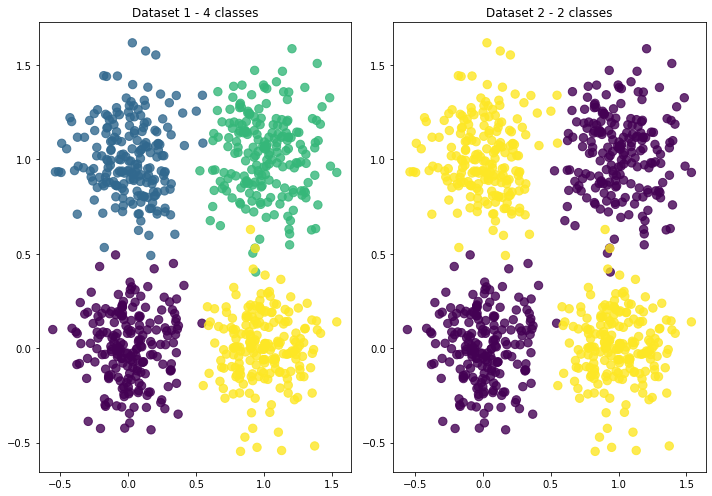

In [21]:
# plot the two generated datasets
fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y, alpha=0.8) 

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin, alpha=0.8) 

plt.tight_layout()

Extend the flipping to multiple gaussians

In [22]:
# we can use the np.mod() function again 
n_classes = 4
y = np.random.choice(n_classes, size=10, replace=True) # generate random labels array
print(y)
y_flip = np.mod(y + 1, n_classes) # add 1 so that all labels actually change
print(y_flip)

[1 1 1 3 3 1 2 3 2 2]
[2 2 2 0 0 2 3 0 3 3]


In [23]:
# we can use the np.mod() function again 
n_classes = 4
y = np.random.choice(n_classes, size=10, replace=True) # generate random labels array
print(y)
y_flip = np.mod(y + 1, n_classes) # add 1 so that all labels actually change
print(y_flip)

[3 0 2 3 1 1 3 3 3 1]
[0 1 3 0 2 2 0 0 0 2]


In [24]:
def flipLabels_multipleGaussian(perc, Y):
    """
    Parameters
    ----------
    perc : float 
        Percentage of labels to be flipped
    Y: array of int of dim n_points
        Array containing the class idx of each data point
    """
    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    # again we can use np.mod()
    n_classes = len(np.unique(y, return_counts=False))
    Y_noisy[idx_to_flip] = np.mod(Y_noisy[idx_to_flip] + 1, n_classes)
    if n_classes == 2:
      Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

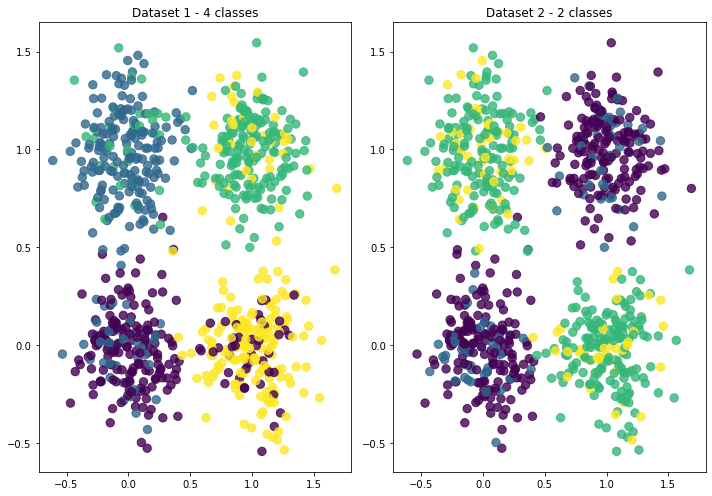

In [25]:
# example of usage
X, y = mixGauss(mu, sigma, 200) 
y_bin = 2 * np.mod(y, 2) - 1
p = 20 # flip 20% of labels
y_noisy = flipLabels_multipleGaussian(p, y)
y_bin_noisy = flipLabels_multipleGaussian(p, y_bin)

# plot the two generated datasets
fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.set_title("Dataset 1 - 4 classes")
ax0.scatter(X[:, 0], X[:, 1], s=70, c=y_noisy, alpha=0.8) 

ax1.set_title("Dataset 2 - 2 classes")
ax1.scatter(X[:, 0], X[:, 1], s=70, c=y_bin_noisy, alpha=0.8) 

plt.tight_layout()